# 🎓 Examen Final: SQL y Gestión de Datos (15 Puntos)

**Contexto:** Eres el Data Steward de la **Universidad Santo Tomás**. Se acerca el cierre de semestre y la decanatura requiere una gestión intensiva de la base de datos: desde registrar ofertas de última hora hasta generar los indicadores finales de deserción y carga académica.

**Instrucciones:**
* Asegúrate de tener el archivo **`universidad.db`** en esta misma carpeta.
* Cada punto tiene un valor de **1.0** sobre 15.
* Usa `conn.commit()` después de las sentencias de modificación (INSERT/UPDATE/DELETE).
* Usa `pd.read_sql_query` para las consultas de selección (SELECT).
Entregado por:
José Diaz Dumett

Sergio Esteban León García

Deison Luis Dimas Hoyos
---

In [5]:
##Se realiza instalación de la librería pandas
!pip install pandas


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# 🛠️ CONFIGURACIÓN INICIAL
import sqlite3
import pandas as pd
import os

db_filename = '../Datos/universidad.db'

if not os.path.exists(db_filename):
    print(f"⚠️ ERROR: No encuentro '{db_filename}'. Súbelo a esta carpeta.")
else:
    conn = sqlite3.connect(db_filename)
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = ON;")
    print(f"✅ Conectado a '{db_filename}'. ¡Listo para el examen!")

✅ Conectado a '../Datos/universidad.db'. ¡Listo para el examen!


## 📝 Sección 1: Gestión Académica (DML) - 5 Puntos

**1. Apertura de Curso (INSERT)**
La facultad abre un nuevo curso electivo.
* Inserta en la tabla `Cursos`:
    * Nombre: **'Big Data & AI'**
    * Créditos: **5**
    * ID Profesor: **20**

**2. Nuevo Ingreso (INSERT)**
Registra a un nuevo estudiante en la tabla `Estudiantes`:
    * Nombre: **'Lionel'**
    * Apellido: **'Messi'**
    * Email: **'lio@usta.edu.co'**
    * Fecha Ingreso: '2024-11-25'

**3. Matrícula Manual (INSERT)**
Matricula al estudiante 'Lionel Messi' en el curso de 'Big Data & AI' que acabas de crear.
* *Pista:* Necesitarás averiguar primero qué ID le asignó la base de datos a Lionel y al curso.
* Nota final: `NULL`.

**4. Corrección de Créditos (UPDATE)**
El comité curricular decidió que 5 créditos es demasiado.
* Actualiza el curso 'Big Data & AI' para que tenga **3 créditos**.

**5. Retiro Definitivo (DELETE)**
El estudiante con **ID = 10** se retira de la universidad.
* Elimina todos sus registros de la tabla `Inscripciones` (para mantener la integridad, primero borramos sus clases).

In [ ]:
# Apertura de Curso (INSERT)
# 1.
cursor.execute("""
    INSERT INTO Cursos (nombre_curso, creditos, id_profesor)
    VALUES ('Big Data & AI', 5, 20);
""")
conn.commit()
# Nuevo Ingreso (INSERT)
# 2.
cursor.execute("""
    INSERT INTO Estudiantes (nombre, apellido, email, fecha_ingreso)
    VALUES ('Lionel', 'Messi', 'lio@usta.edu.co', '2024-11-25');
""")
conn.commit()


In [ ]:
## Consulta de Estudiante Recién Ingresado (SELECT)
pd.read_sql_query("SELECT * FROM Estudiantes WHERE email='lio@usta.edu.co';", conn)


,id_estudiante,nombre,apellido,email,fecha_ingreso
0,501,Lionel,Messi,lio@usta.edu.co,2024-11-25


In [ ]:
## Consulta de Curso Recién Abierto (SELECT)
pd.read_sql_query("SELECT * FROM Cursos WHERE nombre_curso='Big Data & AI';", conn)

,id_curso,nombre_curso,creditos,id_profesor
0,101,Big Data & AI,5,20


In [ ]:
# Matrícula Manual (INSERT)
# 3.
cursor.execute(f"""
    INSERT INTO Inscripciones (id_estudiante, id_curso, nota_final)
    VALUES ({501}, {101}, NULL);
""")
conn.commit()

In [ ]:
##Verificación de la Matrícula (SELECT)
pd.read_sql_query("SELECT * FROM inscripciones WHERE id_estudiante='501';" , conn)

,id_inscripcion,id_estudiante,id_curso,fecha_inscripcion,nota_final
0,2028,501,101,None,None


In [ ]:
# Corrección de Créditos (UPDATE)
# 4.
cursor.execute("""
    UPDATE Cursos
    SET Creditos = 3
    WHERE id_curso = '101';
""")
conn.commit()

In [ ]:
# Retiro Definitivo (DELETE)
# # 5.
cursor.execute("""
    DELETE FROM inscripciones
    WHERE id_estudiante = '10';
""")

In [ ]:
# Verificación del Retiro (SELECT)
pd.read_sql_query("SELECT * FROM inscripciones WHERE id_estudiante='10';", conn)

,id_inscripcion,id_estudiante,id_curso,fecha_inscripcion,nota_final


In [34]:
cursor.execute("""
    DELETE FROM Estudiantes
    WHERE id_estudiante = 10;
""")
conn.commit()

## 🔍 Sección 2: Consultas SQL (Analysis) - 6 Puntos

**6. Métricas Generales (Agregación)**
Calcula y muestra:
* Cantidad total de estudiantes.
* Cantidad total de cursos ofertados.
* Promedio de créditos de los cursos.

**7. Auditoría de Profesores (LEFT JOIN)**
Necesitamos ver la carga laboral completa.
* Lista **todos** los profesores (Nombre y Apellido) y el curso que dictan.
* **Condición:** Deben aparecer los profesores que **NO** tienen cursos asignados actualmente (valor NULL).

**8. Popularidad (GROUP BY)**
* Genera una lista con el `Nombre del Curso` y la **Cantidad de Estudiantes** inscritos en él.
* Ordena del más popular al menos popular.

**9. Cursos Masivos (HAVING)**
* Basado en la consulta anterior, filtra para mostrar solo los cursos que tienen **más de 20 estudiantes** inscritos.

**10. Búsqueda Inteligente (Subconsulta)**
* Obtén el nombre y apellido de los estudiantes inscritos en el curso **"Bases de Datos"**.
* **Reto:** No uses el ID=1 directamente. Usa una subconsulta `(SELECT id_curso FROM Cursos WHERE nombre_curso = 'Bases de Datos')`.

**11. Sábana de Notas (INNER JOIN Múltiple)**
* Genera un reporte detallado que contenga:
    * Nombre Estudiante | Apellido Estudiante | Nombre Curso | Nota Final | Nombre Profesor

In [ ]:
# Espacio para Consultas SQL
# 6.
##Conteo total de estudiantes
pd.read_sql_query("""SELECT COUNT(*) AS total_estudiantes
FROM Estudiantes""", conn)


,total_estudiantes
0,500


In [15]:
##Conteo total de cursos ofertados 
pd.read_sql_query("""SELECT COUNT(*) AS cursos_ofertados
FROM Cursos""", conn)

,cursos_ofertados
0,101


In [37]:
##Promedio de creditos en los cursos ofertados
pd.read_sql_query("""SELECT AVG(creditos) 
FROM Cursos""", conn)

,AVG(creditos)
0,2.70297


In [40]:
##Auditoría profesores y sus cursos
# 7.
pd.read_sql_query("""
SELECT p.nombre, p.apellido, c.nombre_curso
FROM Profesores p
LEFT JOIN Cursos c
ON p.id_profesor = c.id_profesor;
""", conn)

,nombre,apellido,nombre_curso
0,David,Silva,Economía Avanzado
1,David,Silva,Economía Avanzado
2,David,Silva,Inglés Teórico
3,David,Silva,Programación Aplicado
4,David,Silva,Química II
...,...,...,...
107,Fernando,Ruiz,None
108,Fernando,Pineda,None
109,Camila,Jimenez,None
110,Laura,Torres,None


In [ ]:
## Popularidad (GROUP BY)
# 8.
pd.read_sql_query("""
SELECT c.nombre_curso, COUNT(i.id_estudiante) AS inscritos
FROM Cursos c
LEFT JOIN Inscripciones i
ON c.id_curso = i.id_curso
GROUP BY c.nombre_curso
ORDER BY inscritos DESC;
""", conn)

,nombre_curso,inscritos
0,Economía Avanzado,103
1,Ética Avanzado,83
2,Bases de Datos,70
3,Inglés Avanzado,62
4,Inglés III,61
...,...,...
59,Historia Avanzado,14
60,Estadística I,13
61,Arte I,13
62,Física Avanzado,12


In [46]:
## Cursos Masivos (HAVING)
# 9.
pd.read_sql_query("""
SELECT c.nombre_curso, COUNT(i.id_estudiante) AS inscritos
FROM Cursos c
LEFT JOIN Inscripciones i ON c.id_curso = i.id_curso
GROUP BY c.id_curso
HAVING COUNT(i.id_estudiante) > 20;
""", conn)

,nombre_curso,inscritos
0,Bases de Datos,70
1,Economía Avanzado,22
2,Inglés II,21
3,Arte Aplicado,21
4,Economía Avanzado,23
5,Ética III,25
6,Álgebra General,30
7,Biología Avanzado,22
8,Programación Teórico,22
9,Sociología Teórico,21


In [11]:
##  Búsqueda Inteligente (Subconsulta)
# 10.
pd.read_sql_query("""SELECT e.nombre, e.apellido
FROM Estudiantes e
JOIN Inscripciones i ON e.id_estudiante = i.id_estudiante
WHERE i.id_curso = (
    SELECT id_curso
    FROM Cursos
    WHERE nombre_curso = 'Bases de Datos'
);
""", conn)

,nombre,apellido
0,Diego,Martinez
1,Lucia,Zainea
2,Oscar,Mora
3,Fernando,Zainea
4,Valeria,Maya
...,...,...
65,David,Martinez
66,Nicolas,Mora
67,Hector,Ortega
68,Hector,Martinez


In [12]:
## Sábana de Notas (INNER JOIN Múltiple)
# 11.
pd.read_sql_query("""
SELECT 
    e.nombre AS nombre_estudiante,
    e.apellido AS apellido_estudiante,
    c.nombre_curso,
    i.nota_final,
    p.nombre AS nombre_profesor
FROM Inscripciones i
INNER JOIN Estudiantes e ON i.id_estudiante = e.id_estudiante
INNER JOIN Cursos c ON i.id_curso = c.id_curso
INNER JOIN Profesores p ON c.id_profesor = p.id_profesor;
""", conn)

,nombre_estudiante,apellido_estudiante,nombre_curso,nota_final,nombre_profesor
0,Esteban,Perez,Bases de Datos,3.8,Andres
1,Mateo,Pineda,Bases de Datos,4.5,Andres
2,Elena,Navarro,Bases de Datos,1.9,Andres
3,Sofia,Mendoza,Bases de Datos,2.5,Andres
4,Elena,Gutierrez,Bases de Datos,2.5,Andres
...,...,...,...,...,...
2019,David,Ruiz,Inglés Avanzado,1.8,Kevin
2020,David,Ruiz,Economía Básico,2.9,Marta
2021,David,Ruiz,Ética III,2.1,Andres
2022,David,Ruiz,Inglés Avanzado,2.6,Camila


📊 Sección 3: Analítica con Python (Pandas) - 4 Puntos
12. Carga de Datos

Ejecuta la consulta del punto 11 (Sábana de Notas) y guárdala en un DataFrame llamado df_notas.
Muestra las primeras 5 filas y usa .info() para verificar tipos de datos.
13. Análisis de Riesgo

Filtra el DataFrame df_notas para encontrar a los estudiantes que van perdiendo (Nota < 3.0).
Guárdalos en un nuevo DF df_riesgo y cuenta cuántos son.
14. Tabla Pivote (Cruce de Variables)

Crea una tabla dinámica que muestre el Promedio de Notas (values) organizados por Nombre Curso (index) y Nombre Profesor (columns).
15. Visualización (Gráfico)

Usando el DataFrame df_notas, crea un histograma o un gráfico de barras que muestre la distribución de las notas finales.
Opcional: Un gráfico de barras con el Top 5 de cursos con más estudiantes.

In [13]:
## Carga de Datos
# 12.
df_notas = pd.read_sql_query("""
SELECT 
    e.nombre AS nombre_estudiante,
    e.apellido AS apellido_estudiante,
    c.nombre_curso,
    i.nota_final,
    p.nombre AS nombre_profesor
FROM Inscripciones i
JOIN Estudiantes e ON i.id_estudiante = e.id_estudiante
JOIN Cursos c ON i.id_curso = c.id_curso
JOIN Profesores p ON c.id_profesor = p.id_profesor;
""", conn)

df_notas.head()
df_notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nombre_estudiante    2024 non-null   object 
 1   apellido_estudiante  2024 non-null   object 
 2   nombre_curso         2024 non-null   object 
 3   nota_final           2023 non-null   float64
 4   nombre_profesor      2024 non-null   object 
dtypes: float64(1), object(4)
memory usage: 79.2+ KB


In [53]:
df_notas = pd.read_sql_query("""
SELECT 
    e.nombre AS nombre_estudiante,
    e.apellido AS apellido_estudiante,
    c.nombre_curso,
    i.nota_final,
    p.nombre AS nombre_profesor
FROM Inscripciones i
JOIN Estudiantes e ON i.id_estudiante = e.id_estudiante
JOIN Cursos c ON i.id_curso = c.id_curso
JOIN Profesores p ON c.id_profesor = p.id_profesor;
""", conn)

df_notas.head()

,nombre_estudiante,apellido_estudiante,nombre_curso,nota_final,nombre_profesor
0,Esteban,Perez,Bases de Datos,3.8,Andres
1,Mateo,Pineda,Bases de Datos,4.5,Andres
2,Elena,Navarro,Bases de Datos,1.9,Andres
3,Sofia,Mendoza,Bases de Datos,2.5,Andres
4,Elena,Gutierrez,Bases de Datos,2.5,Andres


In [54]:
## Análisis de Riesgo
# 13.
df_riesgo = df_notas[df_notas['nota_final'] < 3.0]
df_riesgo, len(df_riesgo)

(     nombre_estudiante apellido_estudiante     nombre_curso  nota_final  \
 2                Elena             Navarro   Bases de Datos         1.9   
 3                Sofia             Mendoza   Bases de Datos         2.5   
 4                Elena           Gutierrez   Bases de Datos         2.5   
 7                Mateo               Silva   Bases de Datos         2.0   
 8                Jorge                Mora   Bases de Datos         1.9   
 ...                ...                 ...              ...         ...   
 2018             David                Ruiz          Arte II         2.4   
 2019             David                Ruiz  Inglés Avanzado         1.8   
 2020             David                Ruiz  Economía Básico         2.9   
 2021             David                Ruiz        Ética III         2.1   
 2022             David                Ruiz  Inglés Avanzado         2.6   
 
      nombre_profesor  
 2             Andres  
 3             Andres  
 4            

In [55]:
## Tabla Pivote (Cruce de Variables)
# 14.
tabla_pivote = pd.pivot_table(
    df_notas,
    values='nota_final',
    index='nombre_curso',
    columns='nombre_profesor',
    aggfunc='mean'
)
tabla_pivote

nombre_profesor,Ana,Andres,Beatriz,Camila,Daniela,David,Diego,Felipe,Fernando,Gloria,...,Lucia,Mariana,Marta,Mateo,Nicolas,Oscar,Paula,Ricardo,Valentina,Valeria
nombre_curso,,,,,,,,,,,,,,,,,,,,,
Arte Aplicado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.261905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arte Avanzado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arte General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.596296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arte I,NaN,2.969231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arte II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Álgebra Básico,NaN,NaN,NaN,NaN,NaN,NaN,3.353846,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.066667
Álgebra General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.323333
Ética Avanzado,NaN,NaN,3.4625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.031707,NaN,NaN,NaN,NaN,3.894444


In [6]:
!pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


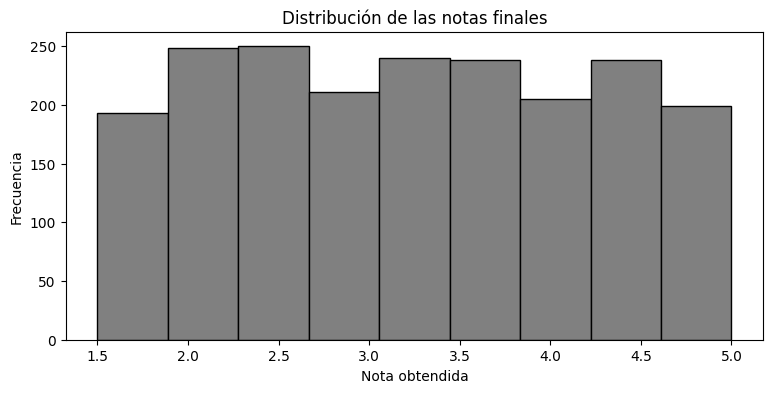

In [ ]:
## Visualización (Gráfico) de distribución de notas
# 15.
import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))
plt.hist(df_notas['nota_final'], bins=9, color='grey', edgecolor='black')
plt.title('Distribución de las notas finales')
plt.xlabel('Nota obtendida')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
## Top 5 Cursos Más Populares (LIMIT)
top5 = pd.read_sql_query("""
SELECT 
    c.nombre_curso,
    COUNT(i.id_estudiante) AS inscritos
FROM Cursos c
LEFT JOIN Inscripciones i ON c.id_curso = i.id_curso
GROUP BY c.nombre_curso
ORDER BY inscritos DESC
LIMIT 5;
""", conn)

top5

,nombre_curso,inscritos
0,Economía Avanzado,103
1,Ética Avanzado,83
2,Bases de Datos,70
3,Inglés Avanzado,62
4,Inglés III,61


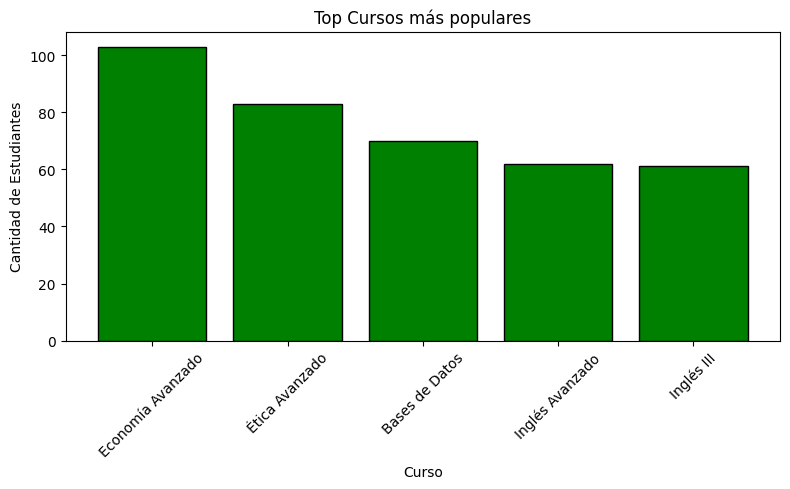

In [ ]:
# Gráfico de Barras para Top 5 Cursos Más Populares
plt.figure(figsize=(8,5))
plt.bar(top5['nombre_curso'], top5['inscritos'], color='green', edgecolor='black')
plt.title('Top Cursos más populares')
plt.xlabel('Curso')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()